# Kombat tower: análise de dados com pandas

<img src="https://i.ytimg.com/vi/LzT2Q5hIh2U/hqdefault.jpg" height="200"/>

# Round  1️⃣ - importando e explorando o dataset, fight!

### Importe as bibliotecas necessárias

In [28]:
# from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o arquivo `.csv` para o ambiente do google colab

### Use o `pandas` para carregar o dataset

In [3]:
df = pd.read_csv("machine1.csv")

### Exiba as cinco primeiras linhas do dataset com `head()`

In [8]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


### Exiba o número total de linhas e colunas do dataset

In [9]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano


### Utilize o método `info()` para obter um resumo das informações do dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


# Round 2️⃣ - identificando os tipos de variáveis, fight!

### Identifique as variáveis `qualitativas nominais`, se houverem

In [14]:
nominais = df.select_dtypes(include=['object', 'string']).columns
nominais = [col for col in nominais if 'date' not in col.lower()]
print(nominais)

['cash_type', 'card', 'coffee_name']


### Identifique as variáveis `qualitativas ordinais`, se houverem

In [ ]:
# nao possui

### Identifique as variáveis `quantitativas discretas`, se houverem

In [ ]:
# nao possui

### Identifique as variáveis `quantitativas contínuas`, se houverem

In [15]:
quant_continuas = df.select_dtypes(include='float').columns
print(quant_continuas)

Index(['money'], dtype='object')


# Round 3️⃣ - manipulando os dados, fight!

### Converta a coluna `datetime` de `object` para o tipo `datetime`

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Verifique e corrija outros possíveis erros de tipo no dataset, se houverem

In [21]:
df['date'] = pd.to_datetime(df['date'])

### Extraia `time`, `date`, `month`, `week` da coluna datetime e crie novas colunas com essas informações

In [ ]:
df['time'] = df['datetime'].dt.time
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.isocalendar().week

,date,datetime,cash_type,card,money,coffee_name,time,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,3,9
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,3,9
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,3,9
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,3,9
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,3,9


# Round  4️⃣ - análisando e explorando os dados, fight!

## Choose your destiny: escolha 3 perguntas para responder, dentre as opções disponíveis abaixo. Plote um gráfico à sua escolha para visualização.

### Identifique o método de pagamento mais escolhido pelos clientes

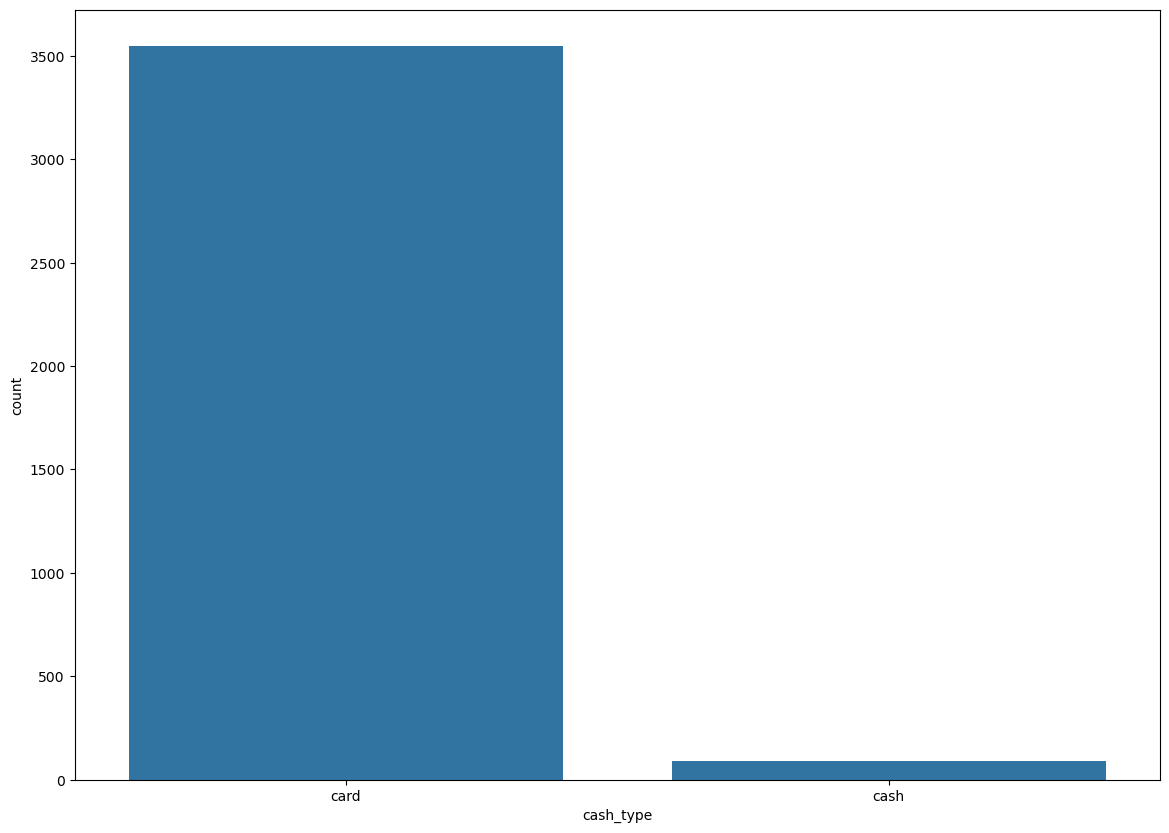

In [29]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(data=df, x="cash_type", ax=ax)

plt.show()

### Descreva a distribuição dos tipos de pagamento escolhidos pelos clientes

### Use a coluna `month`, que você criou, para determinar qual mês gerou mais lucro

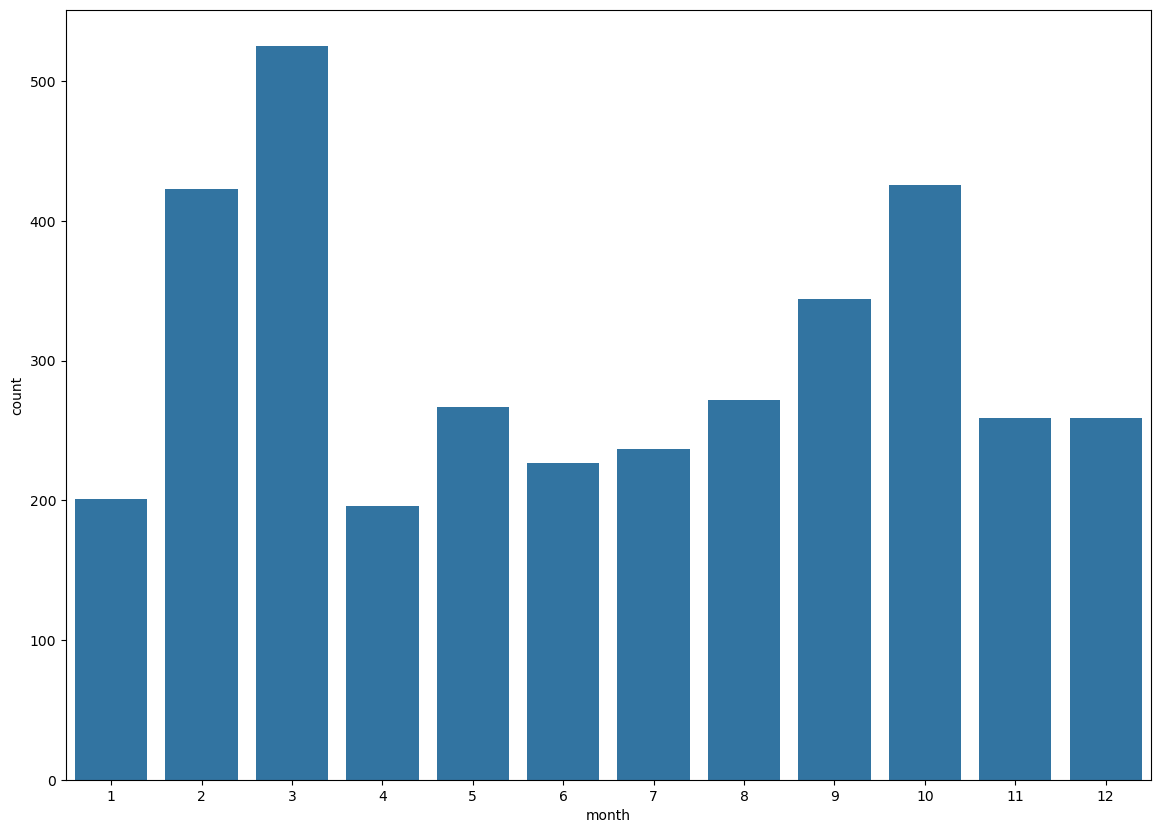

In [30]:
fig, ax = plt.subplots(figsize = (14,10))
sns.countplot(data=df, x="month", ax=ax)

plt.show()

### Determine qual café é o mais comprado pelos clientes

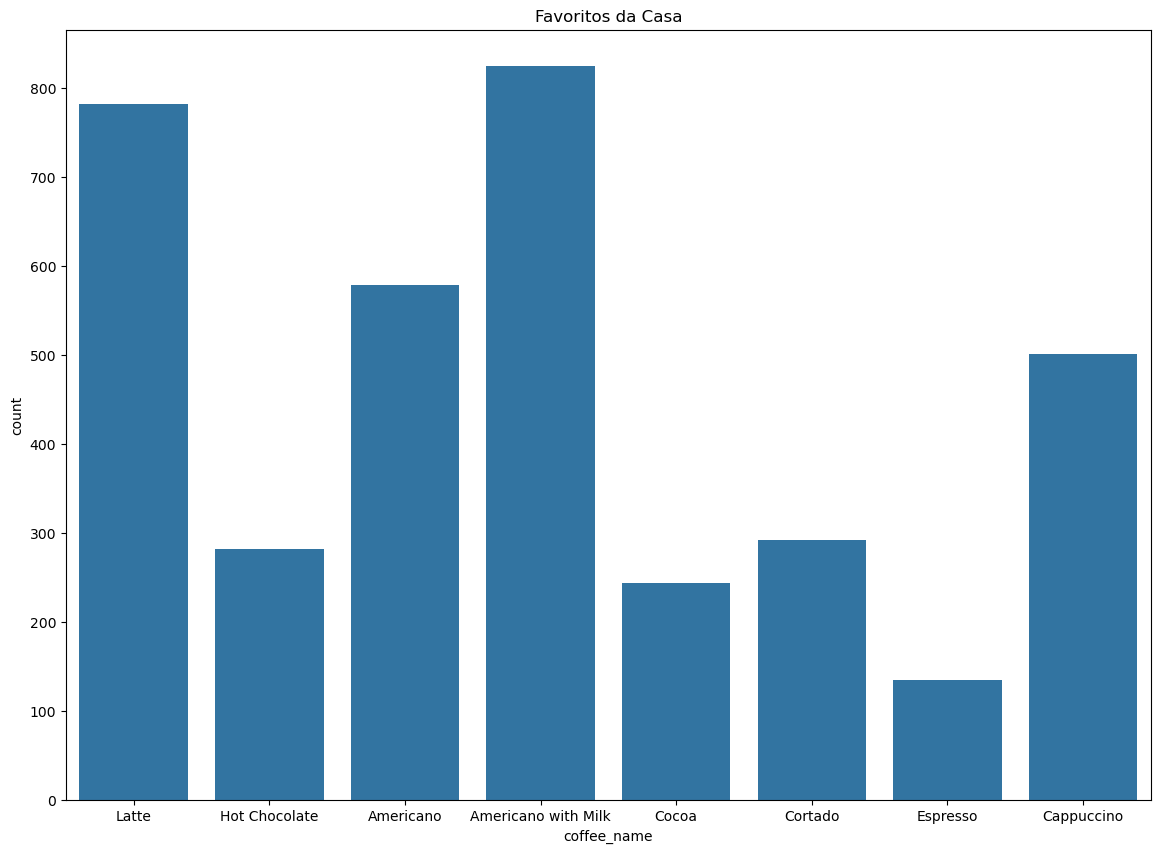

In [31]:
fig, ax = plt.subplots(figsize =(14,10))
sns.countplot(data = df, x="coffee_name",
            order=["Latte",
                   "Hot Chocolate",
                   "Americano",
                   "Americano with Milk",
                   "Cocoa",
                   "Cortado",
                   "Espresso",
                   "Cappuccino"],
            ax=ax)
ax.set_title("Favoritos da Casa")
plt.show()

### Encontre o lucro total gerado por cada tipo de café

### Identifique em quais meses o café mais popular ficou em primeiro lugar nas vendas

# Round 5️⃣ - tratando dados, fight!

### Verifique a necessidade de limpeza ou conversão na coluna `money`

In [32]:
print(df['money'].dtype)

print("-------")

print(df['money'].isna().sum())

float64
-------
0


### Decida qual medida de tendência central (moda, média, mediana) é a mais apropriada para substituir os valores faltantes, justifique sua resposta

In [33]:
# mediana eh a mais apropriada porque nao eh afetada, usar a media poderia distorcer os dados se houver valores muito altos ou muitos baixos
# a moda não faz sentido pq money eh continuo,
# porem não existe nenhum valor nulo.

### Substitua os valores faltantes considerando o tipo de café (imagina-se que a média de um tipo, é diferente da média de outro tipo, por exemplo)

In [ ]:
print(df['coffee_name'].isna().sum())

# não possui valor nulo

0


### Verifique se houve mudança no lucro total gerado por cada tipo de café

In [36]:
total_por_cafe = df.groupby('coffee_name').money.sum()

print(total_por_cafe)

coffee_name
Americano              15062.26
Americano with Milk    25269.12
Cappuccino             18034.14
Cocoa                   8678.16
Cortado                 7534.86
Espresso                2814.28
Hot Chocolate          10172.46
Latte                  27866.30
Name: money, dtype: float64


### Plote um gráfico à sua escolha para visualizar a nova informação

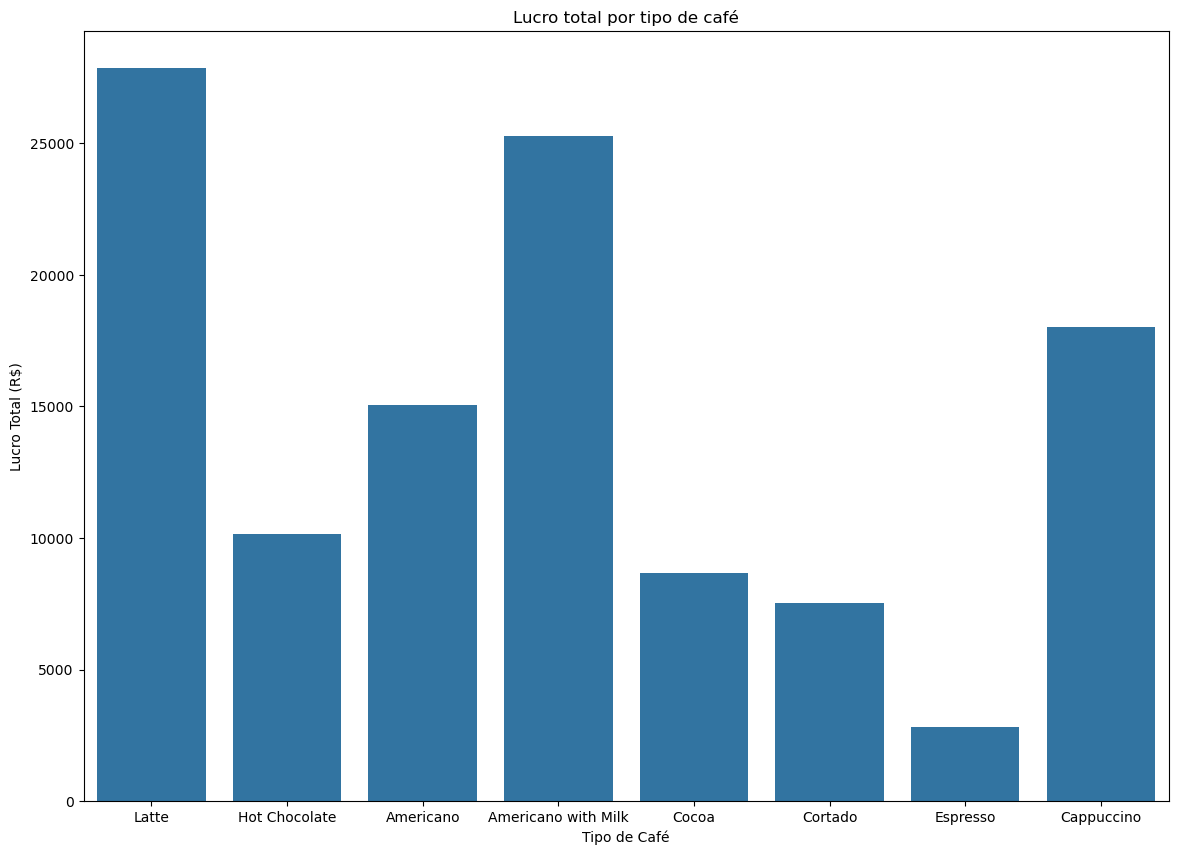

In [40]:
fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x=total_por_cafe.index,
            y=total_por_cafe.values,
            order=["Latte",
                   "Hot Chocolate",
                   "Americano",
                   "Americano with Milk",
                   "Cocoa",
                   "Cortado",
                   "Espresso",
                   "Cappuccino"],
            ax=ax)
ax.set_title("Lucro total por tipo de café")
ax.set_xlabel("Tipo de Café")
ax.set_ylabel("Lucro Total (R$)")
plt.show()

# Round 6️⃣ - gerando insights, fight!

## Choose your destiny: Escolha 3 perguntas para responder, dentre as opções disponíveis abaixo. Compartilhe suas observações, os insights obtidos e plote um gráfico à sua escolha para visualização.

### Visualize a distribuição dos valores de vendas

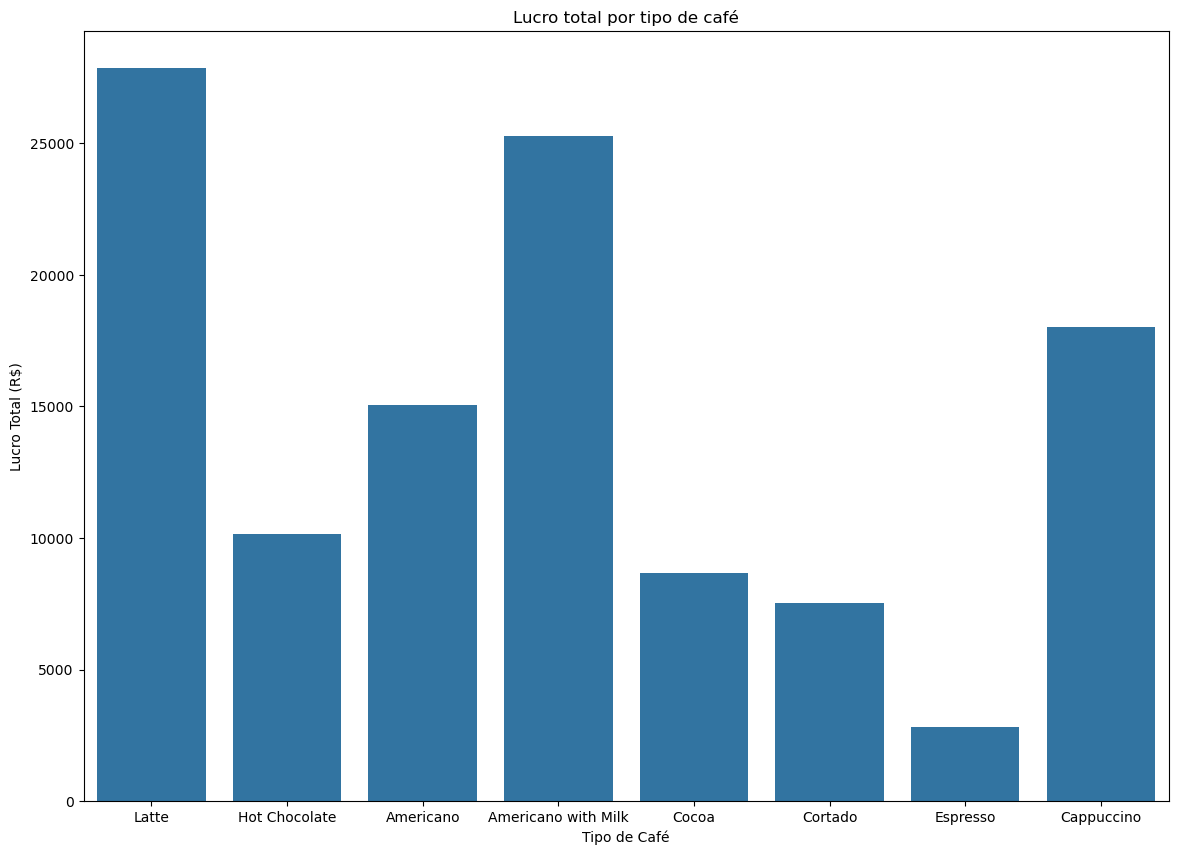

In [41]:
fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x=total_por_cafe.index,
            y=total_por_cafe.values,
            order=["Latte",
                   "Hot Chocolate",
                   "Americano",
                   "Americano with Milk",
                   "Cocoa",
                   "Cortado",
                   "Espresso",
                   "Cappuccino"],
            ax=ax)
ax.set_title("Lucro total por tipo de café")
ax.set_xlabel("Tipo de Café")
ax.set_ylabel("Lucro Total (R$)")
plt.show()

### o lucro total foi pro latte

### Verifique se há sazonalidade nos dados

/tmp/ipykernel_10281/3424911325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


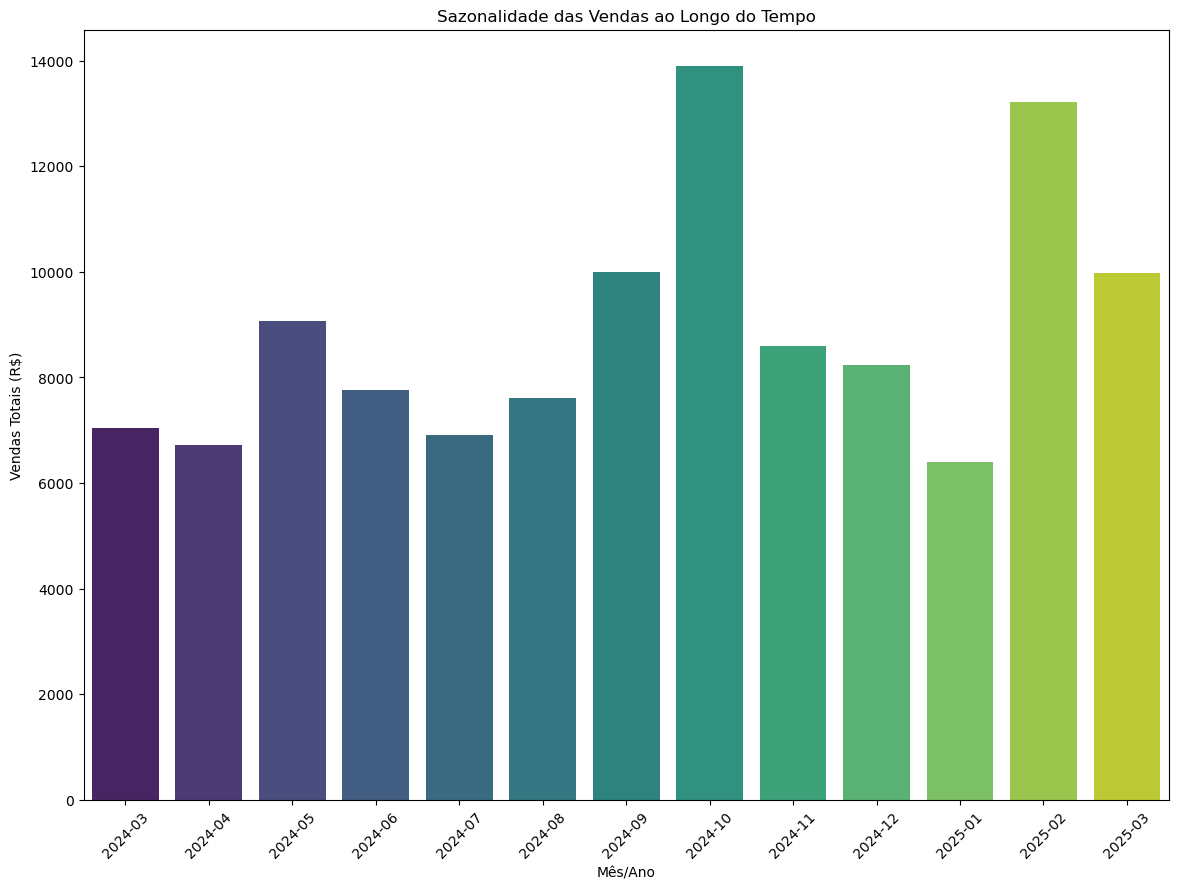

In [42]:
df['year_month'] = df['datetime'].dt.to_period('M')

vendas_mensais = df.groupby('year_month')['money'].sum()

fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(
    x=vendas_mensais.index.astype(str),
    y=vendas_mensais.values,
    palette="viridis",
    ax=ax
)

ax.set_title("Sazonalidade das Vendas ao Longo do Tempo")
ax.set_xlabel("Mês/Ano")
ax.set_ylabel("Vendas Totais (R$)")
plt.xticks(rotation=45)
plt.show()

### Visualize a proporção dos tipos de pagamento

### Realize a análise dos quartis, mediana e outliers

### Realize a análise da dispersão dos dados

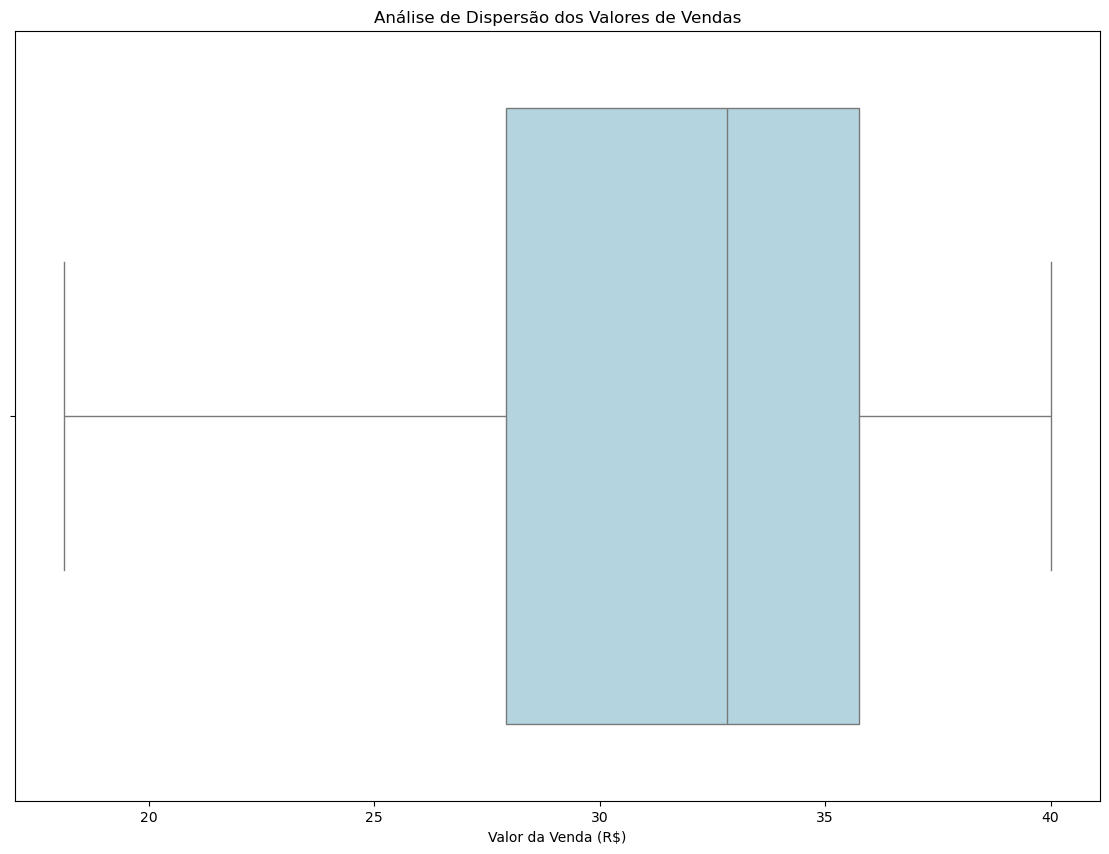

In [47]:
fig, ax = plt.subplots(figsize=(14,10))
sns.boxplot(x=df['money'], color="lightblue", ax=ax)
ax.set_title("Análise de Dispersão dos Valores de Vendas")
ax.set_xlabel("Valor da Venda (R$)")
plt.show()

### Realize a análise do desvio padrão dos dados

# You win! 🫵

<img src="https://sydlexia.com/imagesandstuff/mk3/umk31506.png" height="200"/>